In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
df["cleaned_resume"] = ""

In [4]:
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [5]:
df.shape

(962, 3)

In [6]:
df.nunique()

Category           25
Resume            166
cleaned_resume      1
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='count', ylabel='Category'>

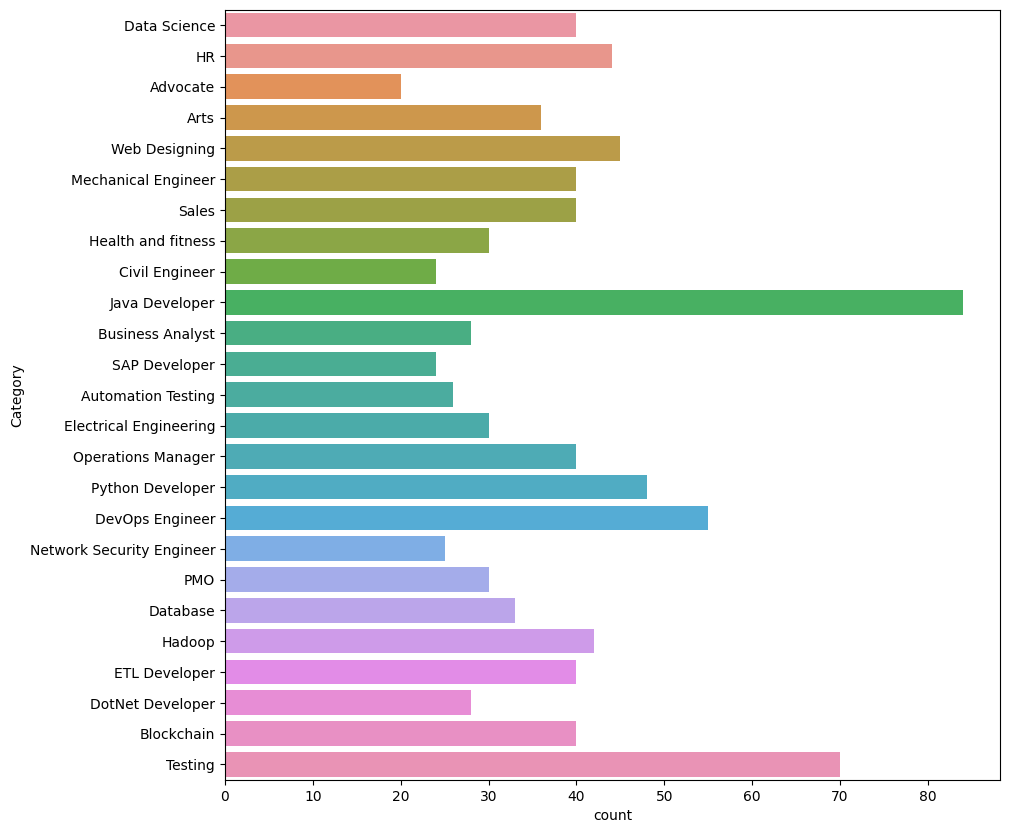

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(y=df["Category"])

In [9]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
import re

In [11]:
def cleanResume(resumeText):
    resumeText = re.sub("http\S+\s*", " ", resumeText) # Remove URL
    resumeText = re.sub("RT|cc", " ", resumeText) # rempve RT and cc
    resumeText = re.sub("#\S+", " ", resumeText) # remove hashtag
    resumeText = re.sub("@\S+", " ", resumeText) # rempve mentions
    resumeText = re.sub("[%s]" % re.escape(string.punctuation), " ", resumeText) # remove punctuations
    resumeText = re.sub(r"[^\x00-\x7f]",r" ", resumeText)
    resumeText = re.sub("\s+", " ", resumeText) # remove extra whitespaces
    return resumeText

In [12]:
df["cleaned_resume"] = df.Resume.apply(lambda x: cleanResume(x))

In [13]:
df

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [14]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [15]:
oneSetOfWords = set(stopwords.words("english"))
totalWords = []
Sentences = df["Resume"].values

cleanedSentences = ""
for i in range(0,900):
    cleanText = cleanResume(Sentences[i])
    cleanedSentences += cleanText
    requiredWords = nltk.word_tokenize(cleanText)
    
    for word in requiredWords:
        if word not in oneSetOfWords:
            totalWords.append(word.lower())

In [16]:
from collections import Counter

In [17]:
dict(Counter(totalWords));

In [18]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('exprience', 3622), ('company', 3445), ('project', 3381), ('months', 3090), ('description', 3006), ('details', 2866), ('data', 2156), ('1', 2027), ('management', 1946), ('team', 1915), ('6', 1310), ('year', 1300), ('system', 1300), ('maharashtra', 1298), ('database', 1226), ('development', 1203), ('business', 1196), ('less', 1127), ('sql', 1111), ('ltd', 1097), ('using', 1088), ('developer', 1069), ('client', 1067), ('java', 1049), ('skill', 1037), ('testing', 1018), ('application', 983), ('january', 975), ('engineering', 974), ('pune', 973), ('services', 956), ('work', 933), ('skills', 915), ('test', 886), ('c', 885), ('software', 833), ('sales', 825), ('responsibilities', 820), ('pvt', 817), ('operations', 791), ('requirements', 781), ('reports', 778), ('education', 777), ('server', 764), ('process', 759), ('technical', 758), ('india', 753), ('customer', 748), ('technologies', 728), ('various', 727)]


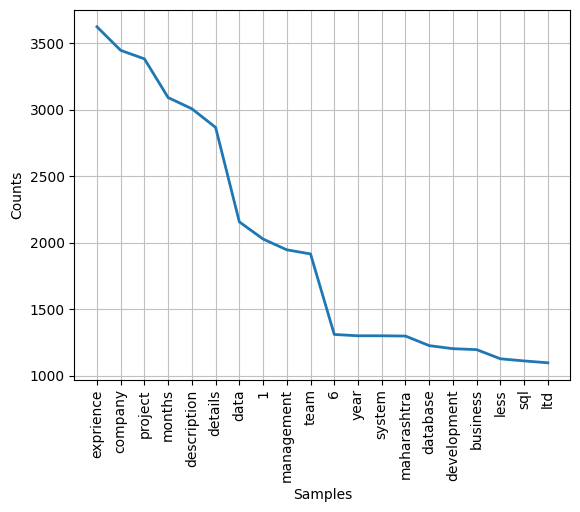

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [19]:
wordfreqdist.plot(20, cumulative=False)

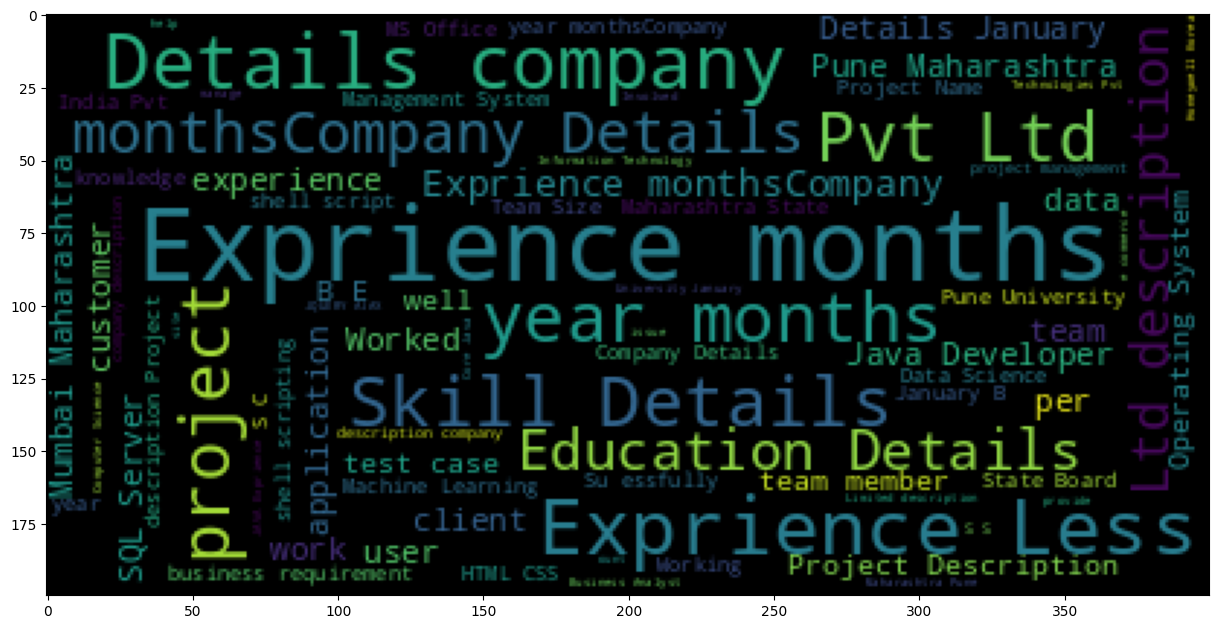

In [20]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc)

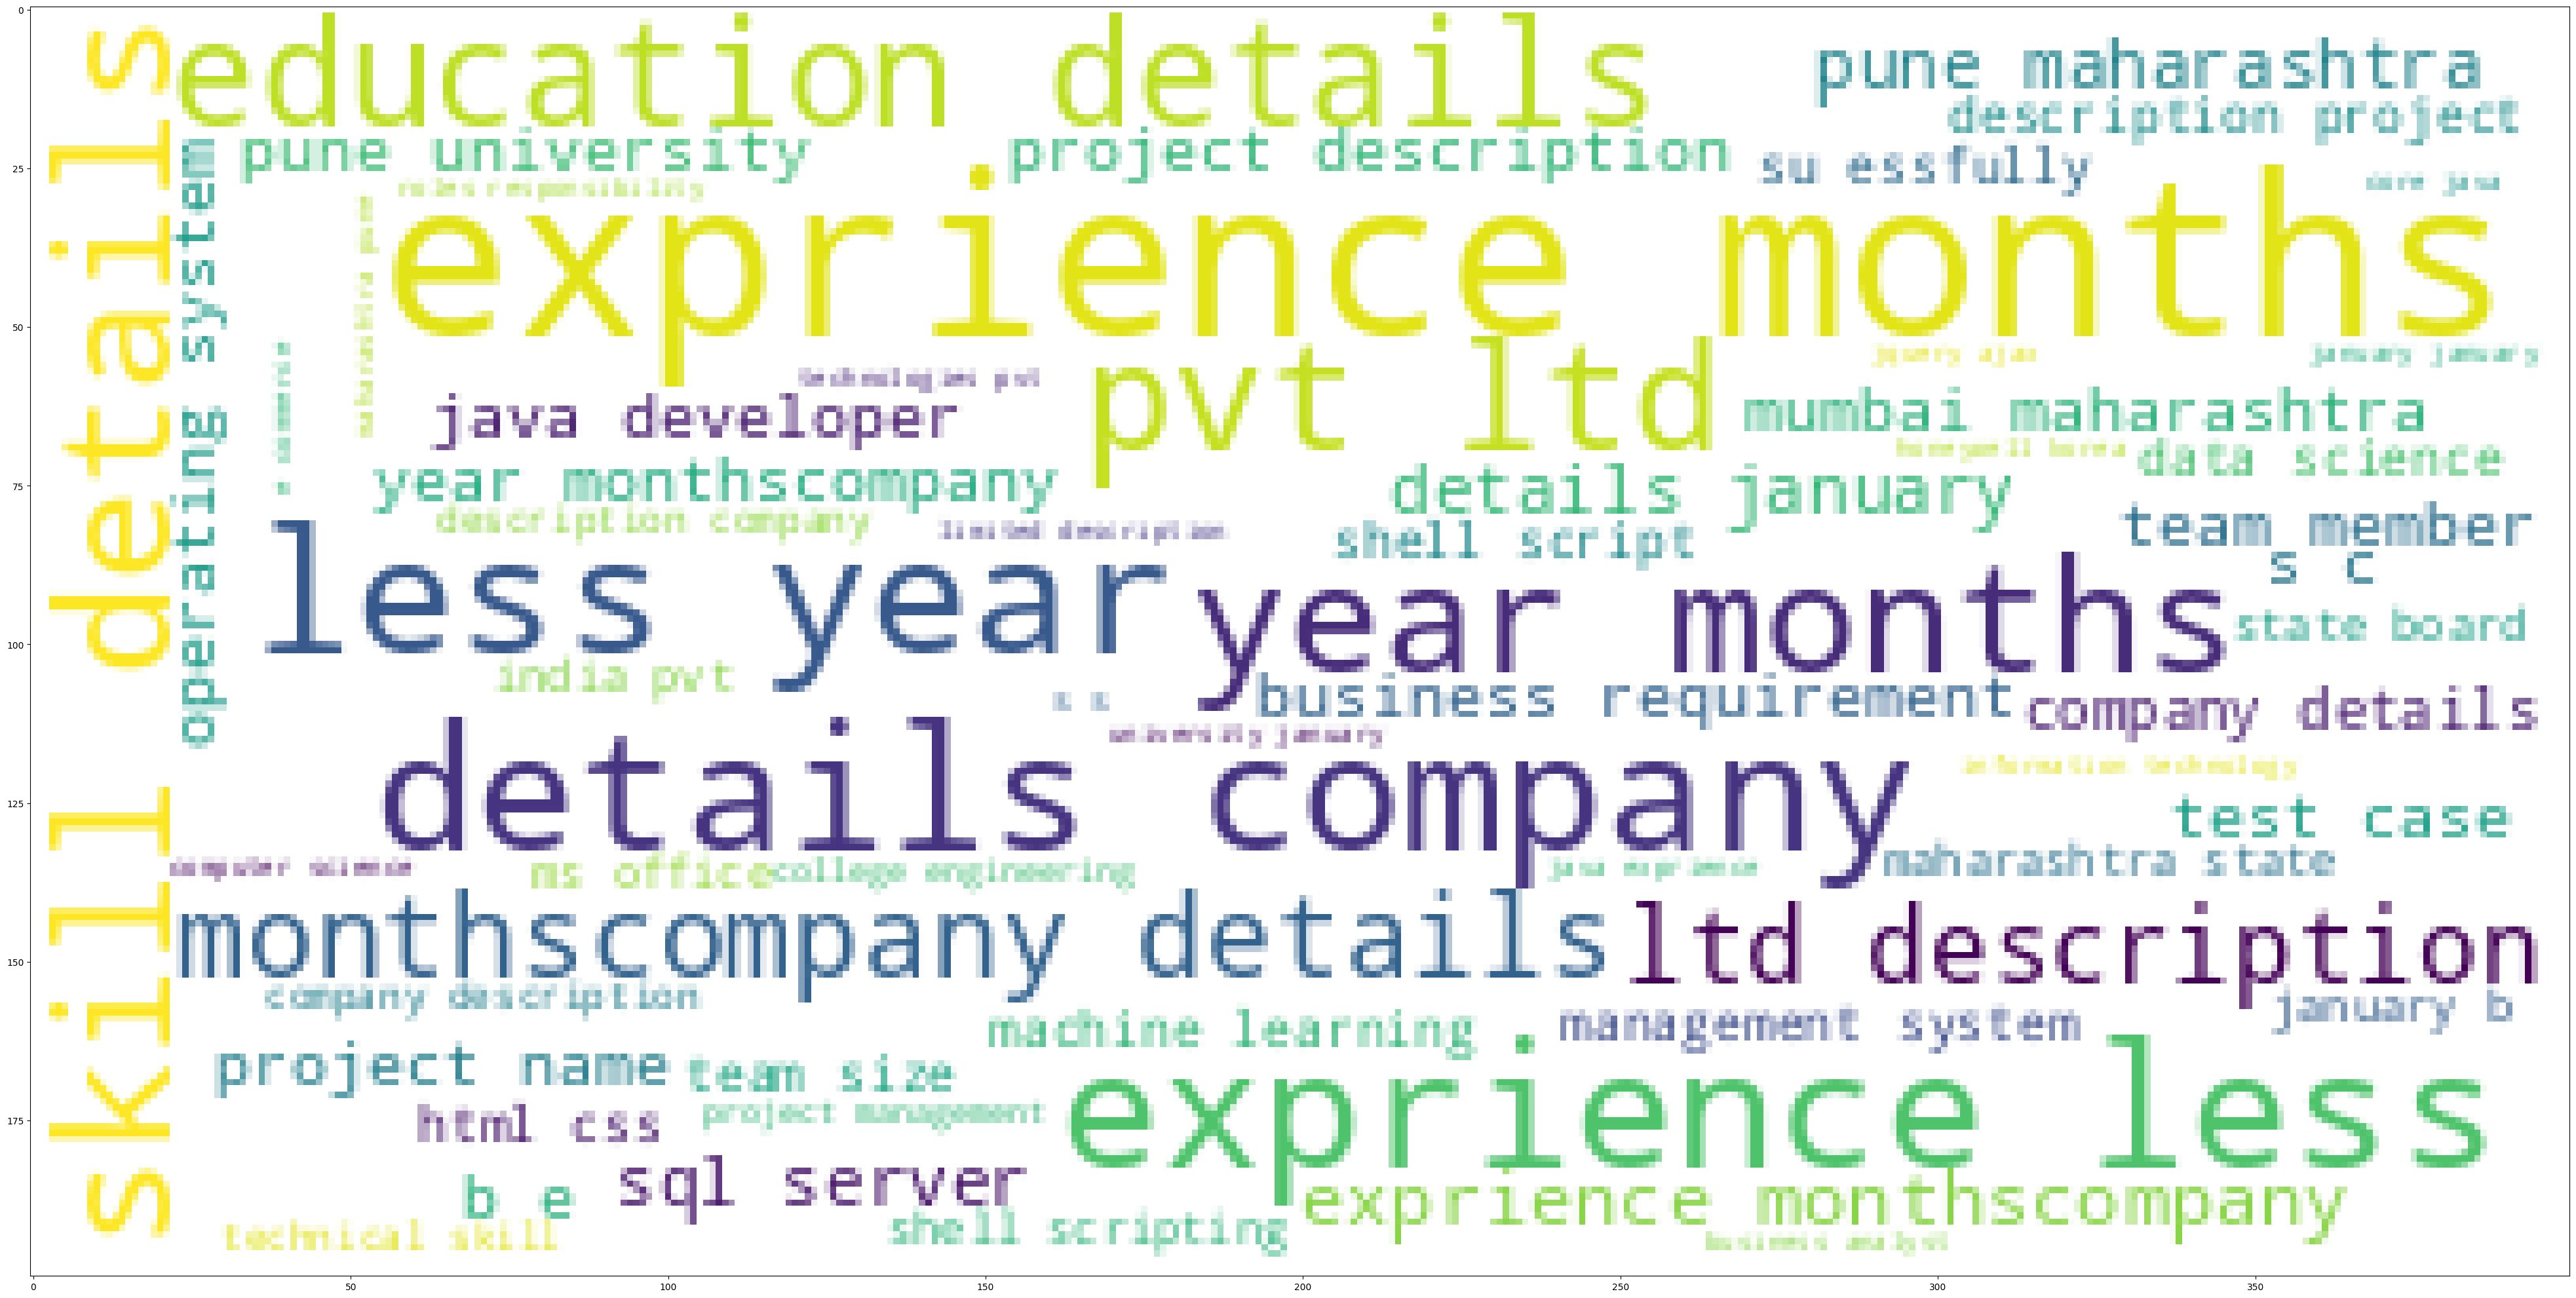

In [21]:
wc = WordCloud(background_color='white',font_step=1).generate(" ".join(totalWords))
plt.figure(figsize=(50,50))
plt.imshow(wc)

In [22]:
# input data
x = df["cleaned_resume"]

# output data
y = df["Category"]

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_new = tfidf.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new,
                                                    y,
                                                   shuffle = True,
                                                    test_size= 0.2,
                                                    random_state = 0,
                                                   stratify= y)

In [25]:
x_new.shape

(962, 7566)

In [26]:
x_train.shape

(769, 7566)

In [27]:
x_test.shape

(193, 7566)

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", random_state=0)
svm.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [29]:
y_pred = svm.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

print(accuracy_score(y_test, y_pred))

1.0


In [31]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00     

In [32]:
from sklearn.neighbors import NearestCentroid

In [33]:
clf = NearestCentroid()

In [34]:
clf.fit(x_train,y_train)

NearestCentroid()

In [35]:
y_pred = clf.predict(x_test)

In [36]:
print(accuracy_score(y_test, y_pred))

0.9948186528497409


In [37]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         5
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      0.88      0.93         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      1.00      1.00        11
         DotNet Developer       1.00      1.00      1.00         6
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00     

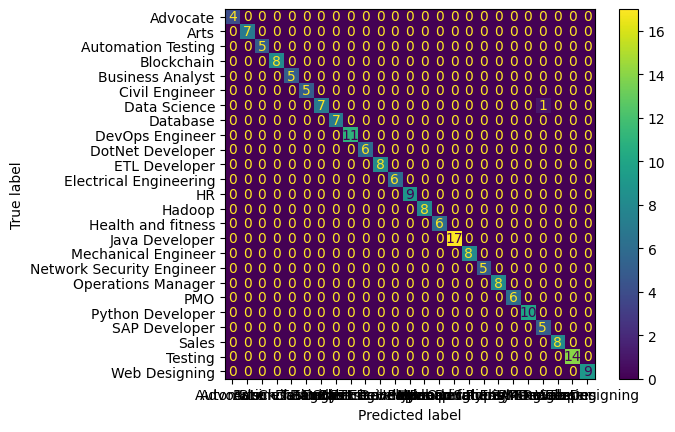

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [76]:
sampleresume=["""
Priyanka Mehra

Certified Full Stack Web Developer

priyanka.mehra@gmail.com

(718) 212-6466

linkedin.com/in/priyankamehra

 

Summary of Qualifications
 

Dedicated and efficient full stack developer with 6+ years experience in application layers, presentation layers, and databases. Certified in both F/E and B/E technologies. Spearheaded successful transition from LAMP stack to MEAN which cut latency by 40% and increased effectiveness of database administrators by 20%. Seeking to further improve HTML5 and CSS3 skills as the future full stack developer at Atmospheric Solutions.

 

Work Experience
 

Full Stack Developer
May 2016–June 2019
General Gaming, Boston, MA

Key Qualifications & Responsibilities

Developed full-stack web applications which processed, analyzed, and rendered data visually.
Liaised with back end developers, front end developers, quality assurance testers, and CTO as needed.
Managed time-sensitive updates, including content changes and database upgrades.
Planned, wrote, and debugged web applications and software with complete accuracy.
Key Achievements

Spearheaded transition from LAMP stack to MEAN stack, reducing latency by 40% and increasing database admin effectiveness by 20%.
 

Junior Full Stack Developer
December 2012–April 2016
Crazy Lazy Apps, Los Angeles, CA

Key Qualifications & Responsibilities

Maximized applications’ efficiency, data quality, scope, operability, and flexibility.
Used various ideas from distributed computing, large-scale design, real-time data processing, data storage, ML, and AI to solve challenging dataset problems.
Managed, optimized, and updated PHP databases as necessary.
Developed app integration with REST / SOAP and other APIs for Google Maps, social media logins, payment processors, and other services.
 

Education
 

Bachelor of Science in Software Development

Champlain College, Burlington, VT

Graduation: 2011

Relevant Coursework: Operating Systems Architecture, Linux/Unix Programming, Usability in Website and Software Design, C++ Programming I & II, Web Page Development, Relational Database Design & SQL, Data Engineering, Advanced Software Programming.

 

Key Skills
 

Google Compute Engine
Android and iOS App Development
HTML, CSS, JavaScript, PHP
Bootstrap & Angular JS
jQuery
SQL Databases
 

Certifications
 

Full-Stack Web Development with React Certification
Front End Web Development Certificate
Back End Web Development Certificate
AWS Certified DevOps Engineer — Professional
Free Code Camp Full Stack Development Certification
 

Awards
 

Dev of the Quarter (Q3/2015) at Crazy Lazy Apps
 

Memberships
 

Association for Women in Computing (AWC)
Association of Information Technology Professionals (AITP)
 

Languages
 

Hindi: Native Proficiency

"""]

In [77]:
sampleresume=list(sampleresume)

In [78]:
sampleresume

['\nPriyanka Mehra\n\nCertified Full Stack Web Developer\n\npriyanka.mehra@gmail.com\n\n(718) 212-6466\n\nlinkedin.com/in/priyankamehra\n\n \n\nSummary of Qualifications\n \n\nDedicated and efficient full stack developer with 6+ years experience in application layers, presentation layers, and databases. Certified in both F/E and B/E technologies. Spearheaded successful transition from LAMP stack to MEAN which cut latency by 40% and increased effectiveness of database administrators by 20%. Seeking to further improve HTML5 and CSS3 skills as the future full stack developer at Atmospheric Solutions.\n\n \n\nWork Experience\n \n\nFull Stack Developer\nMay 2016–June 2019\nGeneral Gaming, Boston, MA\n\nKey Qualifications & Responsibilities\n\nDeveloped full-stack web applications which processed, analyzed, and rendered data visually.\nLiaised with back end developers, front end developers, quality assurance testers, and CTO as needed.\nManaged time-sensitive updates, including content chang

In [79]:
sample = tfidf.transform(sampleresume)

In [80]:
y_pred_sample = clf.predict(sample)

In [81]:
y_pred_sample

array(['Web Designing'], dtype=object)